In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from functools import partial
from imblearn.over_sampling import SMOTE
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

In [2]:
da1=pd.read_csv("./icr-identify-age-related-conditions/train.csv")
test=pd.read_csv("./icr-identify-age-related-conditions/test.csv")


In [3]:
mkdir ~/tabpfn_library
cp -r /opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/tabpfn* ~/tabpfn_library/


SyntaxError: invalid syntax (1842284213.py, line 1)

In [ ]:
import zipfile

zip_path = "/kaggle/working/tabpfn_library.zip"


# Zip 파일 열기
zip_file = zipfile.ZipFile(zip_path)

# 압축 파일 내의 모든 파일 및 디렉토리 목록 가져오기
file_list = zip_file.namelist()

# tabpfn_library.zip 파일의 경로 찾기
for file_name in file_list:
    if file_name.endswith("tabpfn_library.zip"):
        tabpfn_zip_path = file_name
        break

# 경로 출력
print(tabpfn_zip_path)


In [4]:
da_no1=da1[da1["Class"]==1]
da_no0=da1[da1["Class"]==0]

In [5]:
da_no1.to_csv("./icr-identify-age-related-conditions/da_no1.csv")

da_no0.to_csv("./icr-identify-age-related-conditions/sample_data/da_no1_2.numbers")

In [6]:
da_no0.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,509.000000,509.000000,508.000000,509.0
mean,0.416655,3181.597632,115.997626,31.292888,9.816552,5.430932,0.044508,10.539383,3.377568,5194.386843,...,4.139887,1.129568,0.420819,20.341573,136.411031,15821.588253,31.337443,49.300945,9.098095,0.0
std,0.325706,1677.157950,123.507052,39.542608,11.068698,2.107305,0.050073,4.297309,4.484045,1497.148292,...,9.217830,0.558116,1.420333,8.541468,152.953583,19932.516693,9.328552,35.335901,10.398146,0.0
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.007333,0.0
25%,0.239288,2072.223010,85.200147,11.957517,8.138688,4.101717,0.025578,8.072862,1.229900,4183.564000,...,0.173229,0.497060,0.067730,13.906490,72.611063,3086.887077,25.060935,22.152636,0.159008,0.0
50%,0.333294,2919.819540,85.200147,19.405802,8.138688,4.996476,0.025578,10.341582,1.229900,5040.779140,...,2.463620,1.123460,0.250601,18.817946,72.611063,8095.932828,30.742902,40.393260,0.435421,0.0
75%,0.499941,4059.436260,114.923964,35.757962,8.138688,6.422775,0.039585,12.969516,4.469808,6035.885700,...,5.333832,1.477550,0.521521,25.515386,132.099219,21818.071870,36.808132,66.949160,21.978000,0.0
max,4.277273,14503.256020,1910.123198,630.518230,178.943634,17.877462,0.601997,38.971568,54.150740,12083.348910,...,110.342316,4.209350,31.365763,62.667574,1497.351958,143790.071200,80.537324,191.194764,21.978000,0.0


In [7]:
da_no1.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,107.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.0
mean,0.762256,5012.120024,131.004931,75.143672,11.597227,6.085887,0.134840,10.693998,30.088202,6085.619418,...,11.516557,14.865456,0.424737,22.531253,109.582703,9297.425370,32.207374,56.633487,5.863328,1.0
std,0.812348,3783.979443,146.551293,137.717327,7.258732,4.005553,0.990708,4.612481,154.139328,6422.563218,...,17.655941,119.745058,0.470323,14.980096,89.490518,15313.372555,12.099369,39.987869,9.588968,0.0
min,0.132463,192.593280,85.200147,6.073217,8.138688,0.699861,0.025578,3.396778,1.229900,2141.759450,...,0.173229,0.497060,0.067730,5.878864,72.611063,13.038894,11.069975,3.914584,0.001129,1.0
25%,0.362137,3027.833820,85.200147,15.807862,8.138688,4.301044,0.025578,8.584900,1.229900,4053.560707,...,0.173229,0.687445,0.067730,14.572746,72.611063,1689.997689,24.752092,27.323963,0.055100,1.0
50%,0.557627,4088.147140,85.200147,30.463641,8.138688,5.346407,0.025578,11.151389,4.306407,4915.835515,...,7.248373,1.431150,0.257374,18.706322,72.611063,4878.427176,29.561484,43.225675,0.107237,1.0
75%,0.746707,5886.149967,100.031574,48.934923,11.437819,6.788209,0.028699,12.926977,8.405488,6003.076762,...,13.240362,1.854695,0.606183,25.946766,105.473543,11782.964420,37.307676,73.710626,21.978000,1.0
max,6.161666,28688.187660,1237.940805,630.518230,50.253252,38.270880,10.315851,30.192882,1463.693448,53060.599240,...,137.932739,1244.227020,2.614378,135.781294,771.058022,134409.538300,81.210825,176.662964,21.978000,1.0


# 

In [8]:
da1.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [9]:
da_no1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 608
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      108 non-null    object 
 1   AB      108 non-null    float64
 2   AF      108 non-null    float64
 3   AH      108 non-null    float64
 4   AM      108 non-null    float64
 5   AR      108 non-null    float64
 6   AX      108 non-null    float64
 7   AY      108 non-null    float64
 8   AZ      108 non-null    float64
 9   BC      108 non-null    float64
 10  BD      108 non-null    float64
 11  BN      108 non-null    float64
 12  BP      108 non-null    float64
 13  BQ      108 non-null    float64
 14  BR      108 non-null    float64
 15  BZ      108 non-null    float64
 16  CB      108 non-null    float64
 17  CC      107 non-null    float64
 18  CD      108 non-null    float64
 19  CF      108 non-null    float64
 20  CH      108 non-null    float64
 21  CL      108 non-null    float64
 22  CR     

In [20]:
da_hint=pd.read_csv("./icr-identify-age-related-conditions/greeks.csv")

In [21]:
# da_hint=da_hint[da_hint["Alpha"]!="A"]


In [22]:
da_hint

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [23]:
da_hint= da_hint.drop(["Delta","Gamma","Beta",],axis=1)

In [24]:
da_hint

new_data=da_hint.merge(da_no1)

In [25]:
new_data
new_data.to_csv("./icr-identify-age-related-conditions/sample_data/maybe_datq2.csv")

In [49]:
da2=da1.iloc[:,40:]

In [50]:
da2.describe()

,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,557.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.305107,0.640194,69.582596,105.060712,69.117005,71.341526,6.930086,10306.810737,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,1.847499,0.480333,38.555707,68.445620,390.187057,165.551545,64.754262,11331.294051,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.003042,0.000000,5.394675,78.526968,3.828384,7.534128,0.296850,1563.136688,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.003042,0.000000,30.927468,78.526968,4.324656,25.815384,0.296850,5164.666260,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.085176,1.000000,71.949306,78.526968,22.641144,36.394008,1.870155,7345.143424,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.237276,1.000000,109.125159,112.766654,49.085352,56.714448,4.880214,10647.951650,11.516657,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,42.569748,1.000000,109.125159,1063.594578,6501.264480,3030.655824,1578.654237,143224.682300,35.851039,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [18]:
lb = LabelEncoder()
da1.EJ = lb.fit_transform(da1.EJ)  # A->0, B->1

In [19]:
# 상관관계 행렬을 만듭니다.
da1=da1.drop("Id",axis=1)

In [20]:
# 마지막 10개 행만 선택합니다.
data = da1.iloc[-10:, :]

# 이제 선택된 데이터에 대한 상관관계 행렬을 만듭니다.
corr = da1.corr()

corr
corr["Class"]

AB       0.280612
AF       0.302638
AH       0.044645
AM       0.239170
AR       0.064380
AX       0.097616
AY       0.082420
AZ       0.013516
BC       0.155882
BD       0.112184
BN       0.198283
BP       0.157286
BQ       0.281257
BR       0.088554
BZ       0.112423
CB      -0.014777
CC      -0.054723
CD       0.171304
CF       0.109748
CH       0.008144
CL       0.016852
CR      -0.227547
CS      -0.047438
CU      -0.083185
CW      -0.062639
DA      -0.204612
DE      -0.124977
DF       0.064272
DH      -0.206839
DI       0.260760
DL      -0.147716
DN      -0.008478
DU       0.261000
DV       0.015477
DY       0.062734
EB       0.088005
EE      -0.135324
EG      -0.024610
EH       0.179855
EJ       0.096500
EL       0.067947
EP      -0.068383
EU      -0.039739
FC       0.030689
FD       0.131100
FE       0.216359
FI      -0.094327
FL       0.244185
FR       0.104099
FS       0.001139
GB       0.083343
GE      -0.070766
GF      -0.128208
GH       0.033540
GI       0.076894
GL      -0

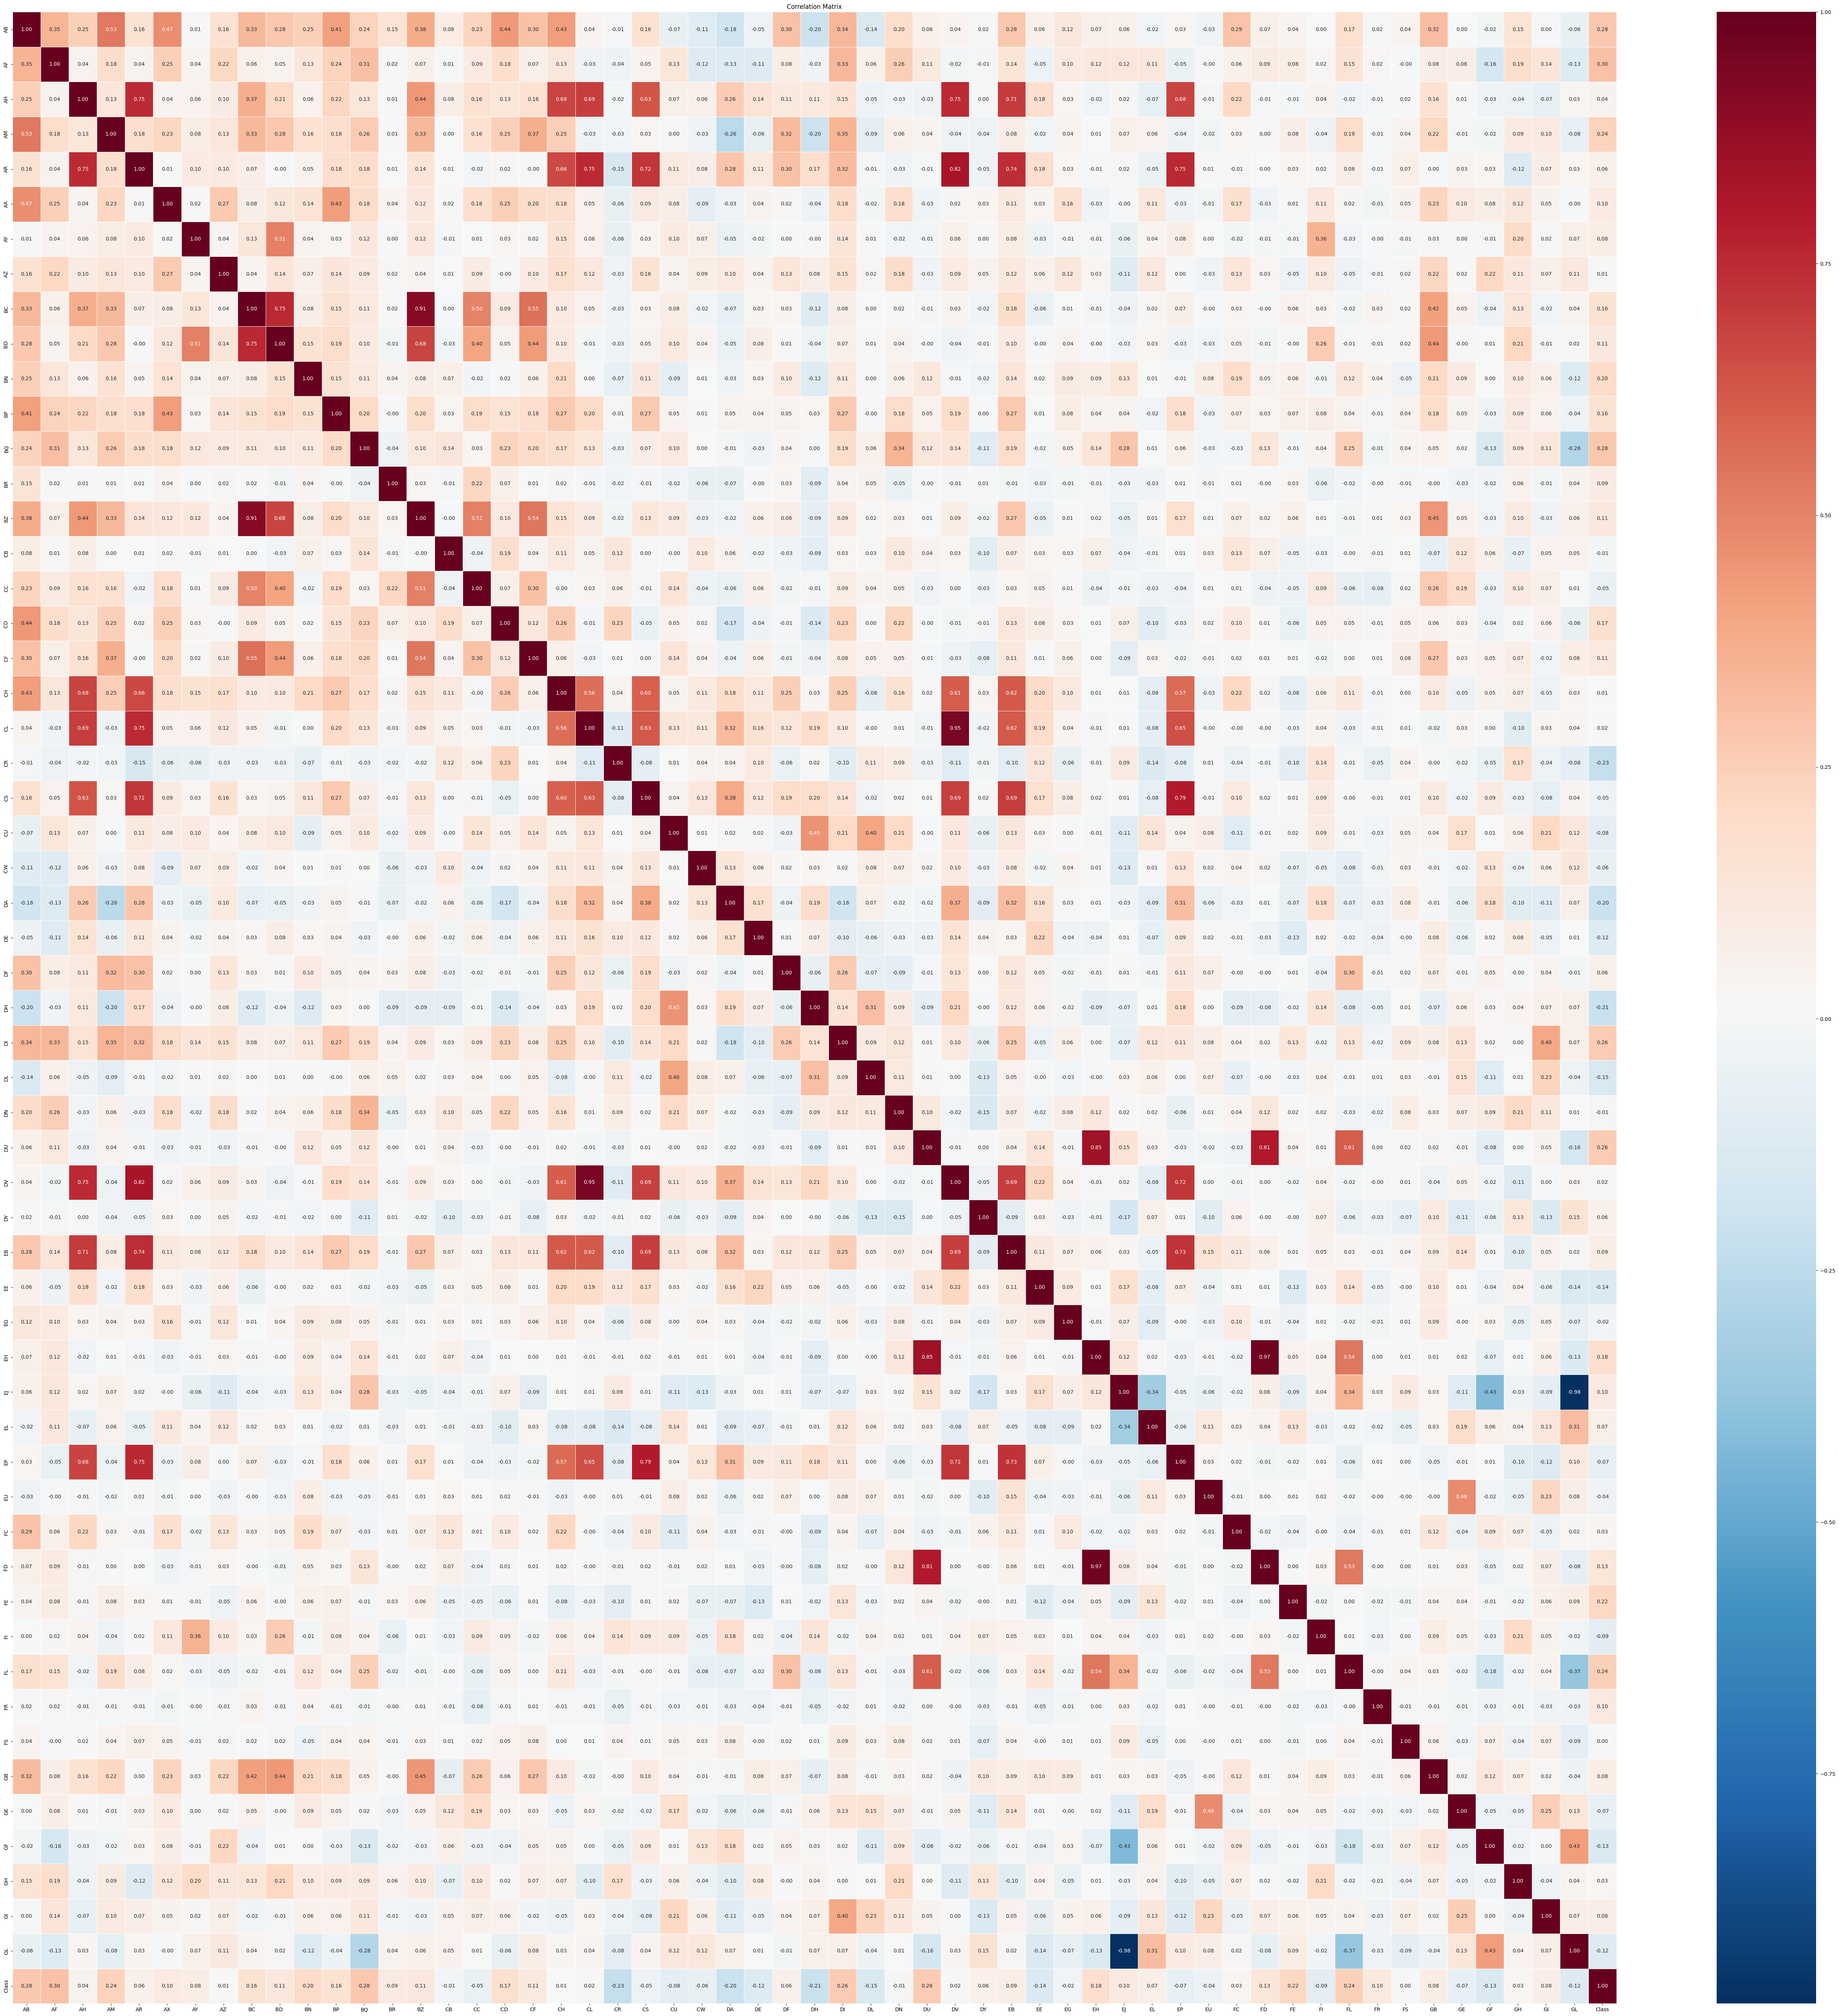

In [21]:
# Seaborn의 heatmap 함수를 사용하여 상관 관계 행렬을 히트맵으로 그립니다.
plt.figure(figsize=(70, 70))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, cmap='RdBu_r')
plt.title('Correlation Matrix')
plt.show()

In [41]:
abs_corr_data= np.abs(corr["Class"])

low_corr= abs_corr_data.nsmallest(8).index

In [42]:
abs_corr_data

AB       0.280612
AF       0.302638
AH       0.044645
AM       0.239170
AR       0.064380
AX       0.097616
AY       0.082420
AZ       0.013516
BC       0.155882
BD       0.112184
BN       0.198283
BP       0.157286
BQ       0.281257
BR       0.088554
BZ       0.112423
CB       0.014777
CC       0.054723
CD       0.171304
CF       0.109748
CH       0.008144
CL       0.016852
CR       0.227547
CS       0.047438
CU       0.083185
CW       0.062639
DA       0.204612
DE       0.124977
DF       0.064272
DH       0.206839
DI       0.260760
DL       0.147716
DN       0.008478
DU       0.261000
DV       0.015477
DY       0.062734
EB       0.088005
EE       0.135324
EG       0.024610
EH       0.179855
EJ       0.096500
EL       0.067947
EP       0.068383
EU       0.039739
FC       0.030689
FD       0.131100
FE       0.216359
FI       0.094327
FL       0.244185
FR       0.104099
FS       0.001139
GB       0.083343
GE       0.070766
GF       0.128208
GH       0.033540
GI       0.076894
GL       0

In [44]:
low_corr

Index(['FS', 'CH', 'DN', 'AZ', 'CB', 'DV', 'CL', 'EG'], dtype='object')

## 일단 전처리부터 하자 


In [25]:
da1.info()

# 우선 a b로되어있는 클래스를 0 과 1로 인코딩 
lb = LabelEncoder()
da1.EJ = lb.fit_transform(da1.EJ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [26]:
da1["EJ"]

0      1
1      0
2      1
3      1
4      1
      ..
612    0
613    1
614    0
615    1
616    0
Name: EJ, Length: 617, dtype: int64

In [27]:
meata= pd.read_csv("./icr-identify-age-related-conditions/greeks.csv")
da1=pd.read_csv("./icr-identify-age-related-conditions/train.csv")

In [28]:
meata = meata[["Alpha"]]

In [29]:
da1.insert(1, 'Alpha', meata['Alpha'])

In [30]:
da1["Alpha"].unique()

array(['B', 'A', 'D', 'G'], dtype=object)

In [31]:
def balance_logloss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    y_pred /= np.sum(y_pred, axis=1)[:, None]
    nc = np.bincount(y_true)
    
    logloss = (-1/nc[0]*(np.sum(np.where(y_true==0,1,0) * np.log(y_pred[:,0]))) - 1/nc[1]*(np.sum(np.where(y_true!=0,1,0) * np.log(y_pred[:,1])))) / 2
    
    return logloss

## 학습을 2번 시켜보자 어떤식으로 

- 1)1.차 분류를 한다 어떻게 알파를 그러면 알파를 라벨인코더 A=0 B=1 G=2 D=3으로 한후
- 2) 이를 통해 y를 맟춰보자

In [32]:
# mapping = {'A': 0, 'B': 1, 'G': 2, 'D': 3}

# train['Alpha'] = train['Alpha'].map(mapping)


In [33]:
#이름 분류를 위해 일시변경
train=da1
lb = LabelEncoder()

for i in ["EJ","Alpha"]:
    train[i] = lb.fit_transform(train[i])

In [34]:
# lb =LabelEncoder()
# train.EJ= lb.fit_transform(train.EJ)
##하위 상관관계 10개 제거 
train = train.drop(columns=["Id",'FS', 'CH', 'DN', 'AZ', 'CB', 'DV', 'CL', 'EG', 'FC', 'GH'])

In [35]:
imp = KNNImputer()
data = imp.fit_transform(train)
train = pd.DataFrame(columns=train.columns,
                    data=data)
train

,Alpha,AB,AF,AH,AM,AR,AX,AY,BC,BD,...,FE,FI,FL,FR,GB,GE,GF,GI,GL,Class
0,1.0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,5.555634,4126.58731,...,9028.291921,3.583450,7.298162,1.73855,11.339138,72.611063,2003.810319,69.834944,0.120343,1.0
1,0.0,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,1.229900,5496.92824,...,6785.003474,10.358927,0.173229,0.49706,9.292698,72.611063,27981.562750,32.131996,21.978000,0.0
2,0.0,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,1.229900,5135.78024,...,8338.906181,11.626917,7.709560,0.97556,37.077772,88.609437,13676.957810,35.192676,0.196941,0.0
3,0.0,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,1.229900,4169.67738,...,10965.766040,14.852022,6.122162,0.49706,18.529584,82.416803,2094.262452,90.493248,0.155829,0.0
4,2.0,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,102.151980,5728.73412,...,16198.049590,13.666727,8.153058,48.50134,16.408728,146.109943,8524.370502,36.262628,0.096614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.0,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,2.804172,4157.68439,...,17167.209610,9.879296,0.173229,1.26092,8.967128,217.148554,8095.932828,69.191944,21.978000,0.0
613,0.0,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,3.777550,5654.07556,...,18460.330020,10.910227,10.223150,1.24236,35.896418,496.994214,3085.308063,124.808872,0.145340,0.0
614,0.0,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,1.229900,5888.87769,...,5088.922912,12.029366,0.173229,0.49706,19.962092,128.896894,6474.652866,119.559420,21.978000,0.0
615,0.0,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,1.229900,4517.86560,...,6464.250832,8.026928,9.256996,0.78764,24.594488,72.611063,1965.343176,37.155112,0.184622,0.0


In [36]:
train

,Alpha,AB,AF,AH,AM,AR,AX,AY,BC,BD,...,FE,FI,FL,FR,GB,GE,GF,GI,GL,Class
0,1.0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,5.555634,4126.58731,...,9028.291921,3.583450,7.298162,1.73855,11.339138,72.611063,2003.810319,69.834944,0.120343,1.0
1,0.0,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,1.229900,5496.92824,...,6785.003474,10.358927,0.173229,0.49706,9.292698,72.611063,27981.562750,32.131996,21.978000,0.0
2,0.0,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,1.229900,5135.78024,...,8338.906181,11.626917,7.709560,0.97556,37.077772,88.609437,13676.957810,35.192676,0.196941,0.0
3,0.0,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,1.229900,4169.67738,...,10965.766040,14.852022,6.122162,0.49706,18.529584,82.416803,2094.262452,90.493248,0.155829,0.0
4,2.0,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,102.151980,5728.73412,...,16198.049590,13.666727,8.153058,48.50134,16.408728,146.109943,8524.370502,36.262628,0.096614,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.0,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,2.804172,4157.68439,...,17167.209610,9.879296,0.173229,1.26092,8.967128,217.148554,8095.932828,69.191944,21.978000,0.0
613,0.0,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,3.777550,5654.07556,...,18460.330020,10.910227,10.223150,1.24236,35.896418,496.994214,3085.308063,124.808872,0.145340,0.0
614,0.0,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,1.229900,5888.87769,...,5088.922912,12.029366,0.173229,0.49706,19.962092,128.896894,6474.652866,119.559420,21.978000,0.0
615,0.0,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,1.229900,4517.86560,...,6464.250832,8.026928,9.256996,0.78764,24.594488,72.611063,1965.343176,37.155112,0.184622,0.0


In [37]:
# ## 오버 셈플링
# X=train.drop(columns=["Class"])
# y=train['Class']

# smote= SMOTE(k_neighbors=5)
# X_resample, y_resample=smote.fit_resample(X,y)
# print(X_resample,y_resample)

# X_resample["Class"] = y_resample
# train=X_resample


In [40]:
# 하이브리드 셈플링
N = 400
c1 = train[train.Class == 1]
c0 = train[train.Class == 0]
print(c1.shape, c0.shape)
c0 = c0.sample(n=N) # 509 -> 300
train = pd.concat([c0, c1])
print(train.shape)
X=train.drop(columns=["Class"])
y=train['Class']

smote= SMOTE(k_neighbors=5)
X_resample, y_resample=smote.fit_resample(X,y)
print(X_resample,y_resample)

X_resample["Class"] = y_resample
train=X_resample
train.to_csv("./icr-identify-age-related-conditions/test3.csv")
train



(108, 48) (509, 48)
(508, 48)
        Alpha        AB           AF          AH         AM         AR   
0    0.000000  0.329021  1927.493700  114.923964  13.679449   8.138688  \
1    0.000000  0.292700  4199.753910   89.406594  10.545285   8.138688   
2    0.000000  0.243561  2999.655340   85.200147   9.693610  10.388364   
3    0.000000  0.969971  4909.702050   85.200147  35.110689   8.138688   
4    0.000000  0.230742  6157.134610   85.200147   9.235254   8.138688   
..        ...       ...          ...         ...        ...        ...   
795  1.879446  0.650289  5385.873920  222.267269  35.576874   8.138688   
796  1.351381  0.348431  4263.307652   87.134179  12.484087  10.176102   
797  1.000000  0.547990  3660.231229  118.550081  19.624597   8.138688   
798  1.000000  0.446699  2603.345518  108.540947  15.338694   8.138688   
799  1.000000  0.396973  2079.108857   85.200147  59.085867   8.138688   

           AX        AY          BC           BD   ...        FD    
0    5.39513

,Alpha,AB,AF,AH,AM,AR,AX,AY,BC,BD,...,FE,FI,FL,FR,GB,GE,GF,GI,GL,Class
0,0.000000,0.329021,1927.493700,114.923964,13.679449,8.138688,5.395131,0.025578,1.229900,6883.408970,...,6051.457820,13.628136,0.173229,0.497060,27.022310,72.611063,11236.110530,78.332832,21.978000,0.0
1,0.000000,0.292700,4199.753910,89.406594,10.545285,8.138688,4.048563,0.025578,1.229900,6652.422065,...,7338.952502,9.633968,0.173229,1.732170,18.357497,152.337913,1831.028571,41.930030,21.978000,0.0
2,0.000000,0.243561,2999.655340,85.200147,9.693610,10.388364,3.508164,0.025578,1.229900,5675.760420,...,13699.297650,10.739324,5.422093,1.412880,25.506084,176.869931,2785.931820,54.665288,0.284795,0.0
3,0.000000,0.969971,4909.702050,85.200147,35.110689,8.138688,9.027321,0.025578,1.229900,4813.136050,...,4883.391039,11.516657,4.481100,1.422450,9.925234,72.611063,9825.552396,62.653920,0.229755,0.0
4,0.000000,0.230742,6157.134610,85.200147,9.235254,8.138688,7.370688,0.025578,1.229900,5250.404780,...,2846.420495,16.842215,5.062771,0.497060,21.180654,72.611063,1512.544509,50.917884,0.217521,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.879446,0.650289,5385.873920,222.267269,35.576874,8.138688,3.749362,0.125909,566.793874,24809.021871,...,4597.793471,14.659342,6.558012,11.935259,20.761836,72.611063,1384.263921,34.517947,0.105546,1.0
796,1.351381,0.348431,4263.307652,87.134179,12.484087,10.176102,6.046311,0.025578,7.567588,4555.647944,...,10039.411286,10.844358,30.799038,16.711512,28.321411,72.611063,2562.623373,57.882077,7.743176,1.0
797,1.000000,0.547990,3660.231229,118.550081,19.624597,8.138688,4.880558,0.026855,1.920187,7271.491394,...,4237.217359,8.921107,10.390757,2.198919,23.561931,92.466394,4550.796860,40.640926,0.072793,1.0
798,1.000000,0.446699,2603.345518,108.540947,15.338694,8.138688,4.652126,0.056995,3.325157,6558.232865,...,4223.760483,9.228385,9.110703,1.875280,21.634628,86.507322,5680.748620,46.279661,0.075903,1.0


In [ ]:
# set metric
evaluation_metric = balance_logloss

# X = train.drop(columns=["Class"])
# #X = train[selected_cols]
# y = train['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

In [ ]:
#def rf_opration:
    
rf = RandomForestClassifier(n_estimators=59,
                             max_depth=5,
                            min_samples_split=2,
                            max_features=0.8,
                            n_jobs=-1,
                            random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(n_estimators=200,
                    max_depth=5,
                    colsample_bynode=0.5,
                    reg_lambda=0.1,
                    learning_rate=1e-2,
                    random_state=42,
                    n_jobs=-1)
xgb.fit(X_train, y_train)

In [ ]:

print("-- Random Forest --")
print("Train ACC : %.3f" % accuracy_score(y_train, rf.predict(X_train)))
print("Val ACC : %.3f" % accuracy_score(y_val, rf.predict(X_val)))

print("\n-- XGBoost --")
print("Train ACC : %.3f" % accuracy_score(y_train, xgb.predict(X_train)))
print("Val ACC : %.3f" % accuracy_score(y_val, xgb.predict(X_val)))

In [ ]:
v_rf = rf.predict_proba(X_val)

v_xgb = xgb.predict_proba(X_val)
X2=X.drop("Alpha",axis=1)

In [ ]:
x_test=test[X2.columns].fillna(X2.mean())
x_test.EJ = lb.fit_transform(x_test.EJ)

In [ ]:
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)

In [ ]:
preds_rf=rf.predict_proba(x_test)
#preds_lr = best_lr.predict_proba(X_test)
preds_xgb=xgb.predict_proba(x_test)


In [ ]:
v_rf = rf.predict_proba(X_val)
# v_lr = best_lr.predict_proba(X_val)
v_xgb =xgb.predict_proba(X_val)
# v_svm = best_svm.predict_proba(X_val)


In [ ]:
# OOF prediction
#ensembles = np.mean([v_rf, v_lr, v_xgb, v_svm, v_nn], axis=0)
# ensembles = np.mean([v_rf, v_xgb, v_svm], axis=0)
ensembles = np.mean([v_rf, v_xgb], axis=0)
print("OOF prediction logloss : %.4f" % evaluation_metric(y_val, ensembles))

In [ ]:
submission = pd.read_csv("./icr-identify-age-related-conditions/sample_submission.csv")
submission

In [ ]:
rf

In [ ]:
voting_weights = [0.5, 0.5]
submission['class_0'] = voting_weights[0]*preds_rf[:, 0] + voting_weights[1]*preds_svm[:, 0]
submission['class_1'] = voting_weights[0]*preds_rf[:, 1] + voting_weights[1]*preds_svm[:, 1]
submission